# CoreNLP Parsing with NLTK Wrapper

<br>
This utilizes the NLTK Wrapper for CoreNLP in order to parse sentences from BBN/ACCENT to identify additionally verbs to add to PETRARCH Dictionaries to increase precision and Recall
<br>
<br>
Setup Environment

In [1]:
from nltk.parse.corenlp import CoreNLPServer
from nltk.parse.corenlp import CoreNLPDependencyParser
from nltk.parse import CoreNLPParser

import pandas as pd

import pprint
import nltk

from nltk.tree import *
from IPython.display import display

### Server Terminal > cd $CORENLP_HOME
<br>
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -annotators "tokenize,ssplit,pos,lemma,parse,sentiment" -port 9000 -timeout 30000
<br>
<br>
Connect parser to server running CoreNLP

In [9]:
parser = CoreNLPParser('http://localhost:9000')
depr = CoreNLPDependencyParser('http://localhost:9000')

# NYTBatch50 Accent
#### Read in NYTbatch50 BBN/ACCENT DATA, trim to CAMEO 145, and create a subset of events to test

In [48]:
extract = pd.read_csv('nytextract.csv')
protest_violent = extract[extract.code == 145].reset_index()
small = protest_violent.head()
small

,index,aid,code,text,bad
0,240,22338793,145,\n Yesterday the news agency reported that...,0
1,241,22339503,145,"""Thirty-four men arrested late last night were...",0
2,242,22395783,145,"""In the worst outbreak of street violence in 1...",0
3,243,22398252,145,Paris policemen and leftist extremists clash a...,0
4,244,22407123,145,"Violence occurred through most of the day, des...",0


#### Create regular sentence parser: input data and column

In [3]:
def core_parser(df, col):
    parse = []
    i = ""
    for i in range(len(df)):
        parse.append(i)
        parse[i] = next(parser.raw_parse(df[col].iloc[i]))
    return parse

#### Run core_parser with small batch data

In [49]:
%time protest_violent['parsed'] = core_parser(protest_violent, 'text')

CPU times: user 110 ms, sys: 9.06 ms, total: 119 ms
Wall time: 31.3 s


#### To view each parse-tree, index new column starting at 0

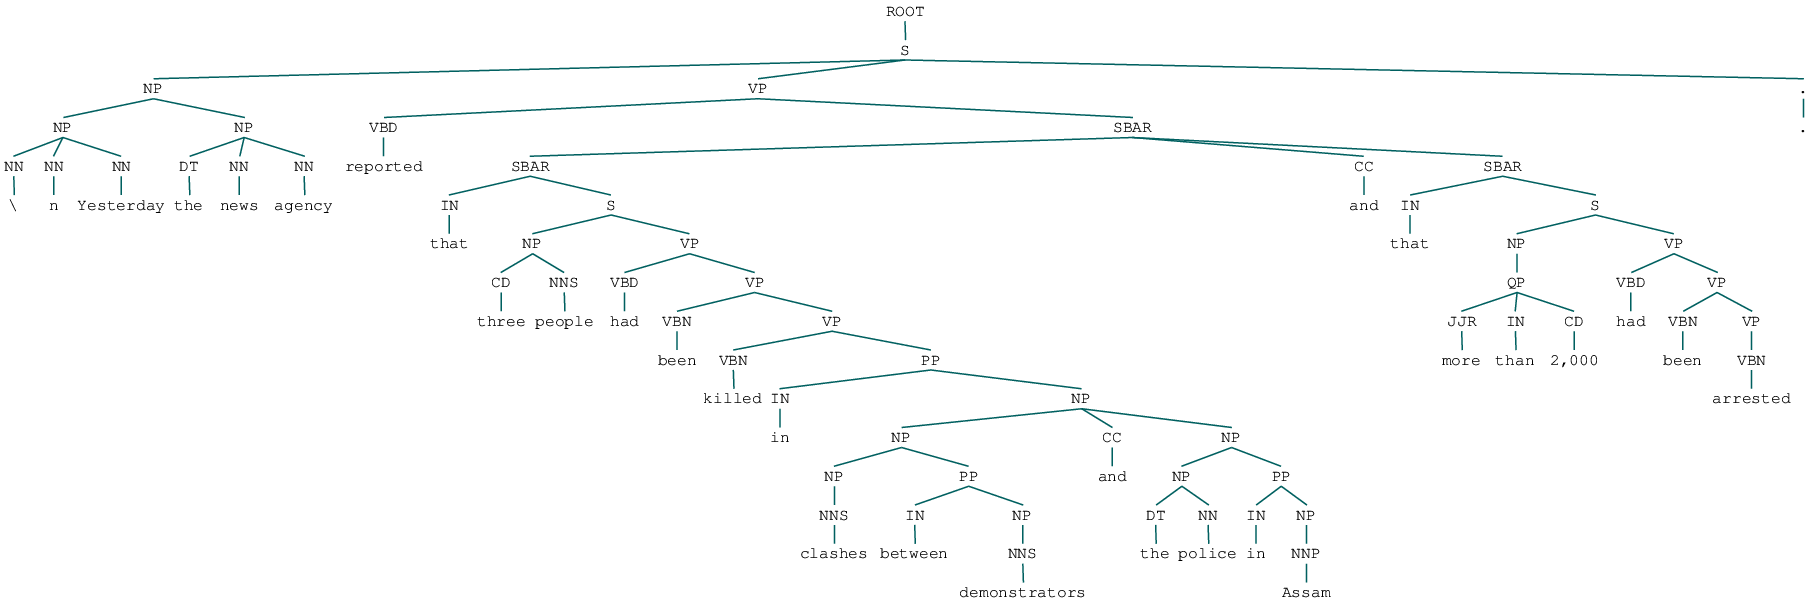

In [51]:
protest_violent['parsed'].iloc[0]

#### Create dependency sentence parser: input data and column

In [4]:
def dep_parser(df, col):
    dep = []
    i = ""
    for i in range(len(df)):
        dep.append(i)
        dep[i] = next(depr.raw_parse(df[col].iloc[i]))
    return dep

#### Run dep_parser with small batch test data

In [52]:
%time protest_violent["dep"] = dep_parser(protest_violent, 'text')

CPU times: user 116 ms, sys: 12.2 ms, total: 129 ms
Wall time: 2.07 s


#### To view each dependency parse-tree, index new column starting at 0

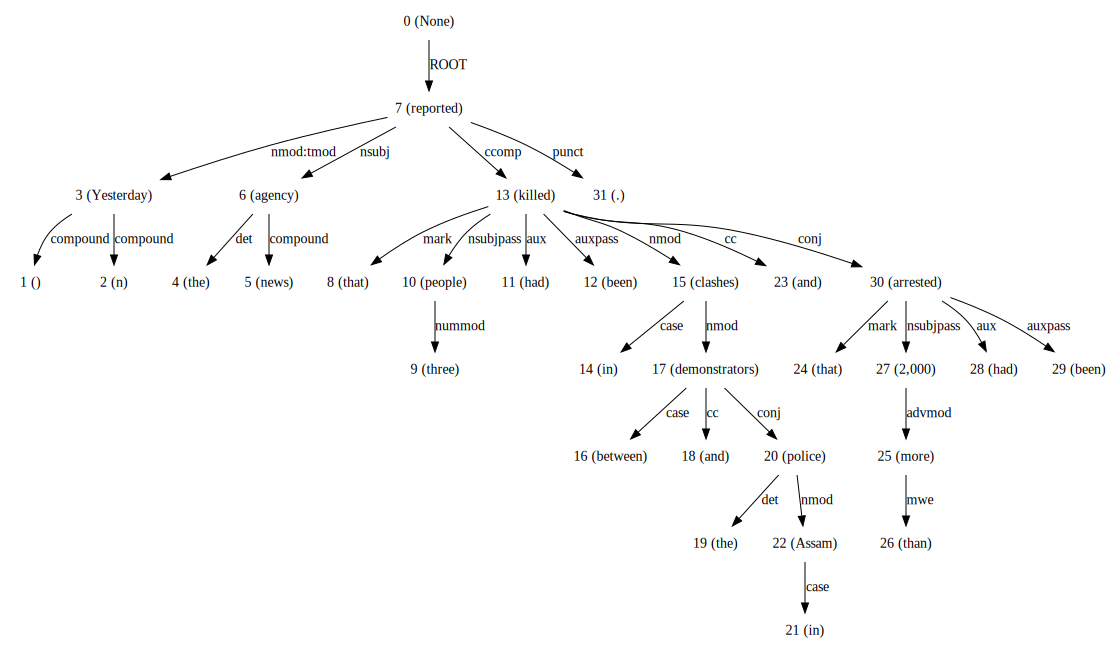

In [53]:
protest_violent["dep"].iloc[0]

#### To view both trees simultaneously, use function 'easy_read' with three arguments (dataframe, index number) (this is provided you use the same naming scheme I used, but easy to change)

In [5]:
def easy_read(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))

In [ ]:
easy_read(nyt, nyt_dep, protest_violent, 24, 'text')

In [ ]:
protest_violent

# NYTbd Sample 14-18
Read in data

In [112]:
sample1418 = pd.read_csv("Data/ACCENT NYTbd sample 14 18.csv")

In [113]:
# Trim to Root Code 18
assault = sample1418[sample1418["root_code"] == 18].reset_index().drop(['index'], axis = 1)

In [114]:
%time assault['parsed'] = core_parser(assault, 'text')

CPU times: user 328 ms, sys: 57.1 ms, total: 386 ms
Wall time: 2min 13s


In [115]:
%time assault['dep'] = dep_parser(assault, 'text')

CPU times: user 319 ms, sys: 41.9 ms, total: 361 ms
Wall time: 17.9 s


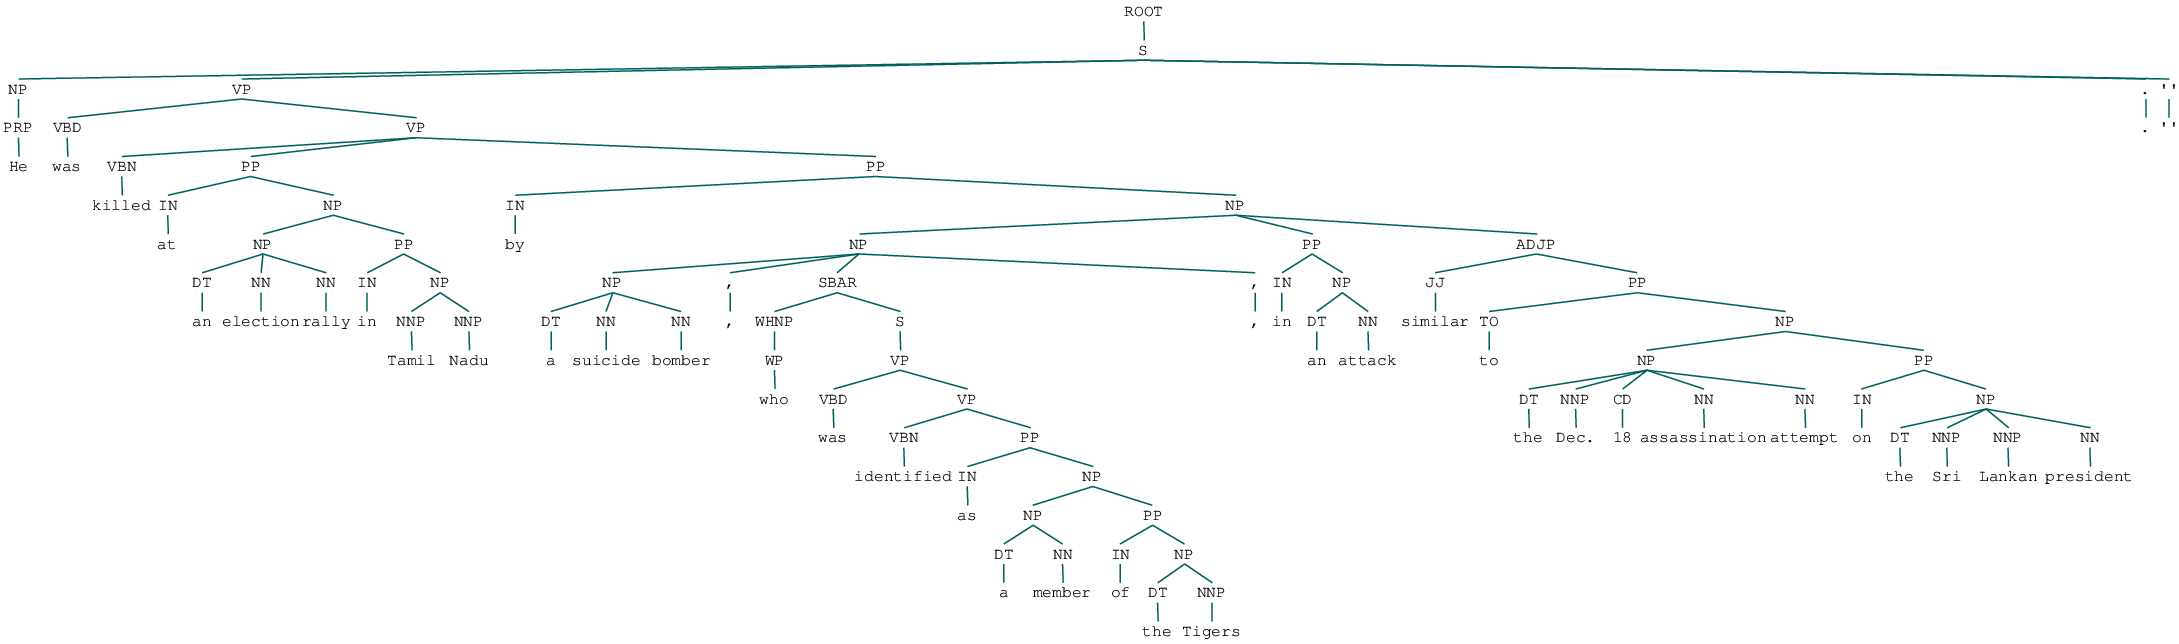

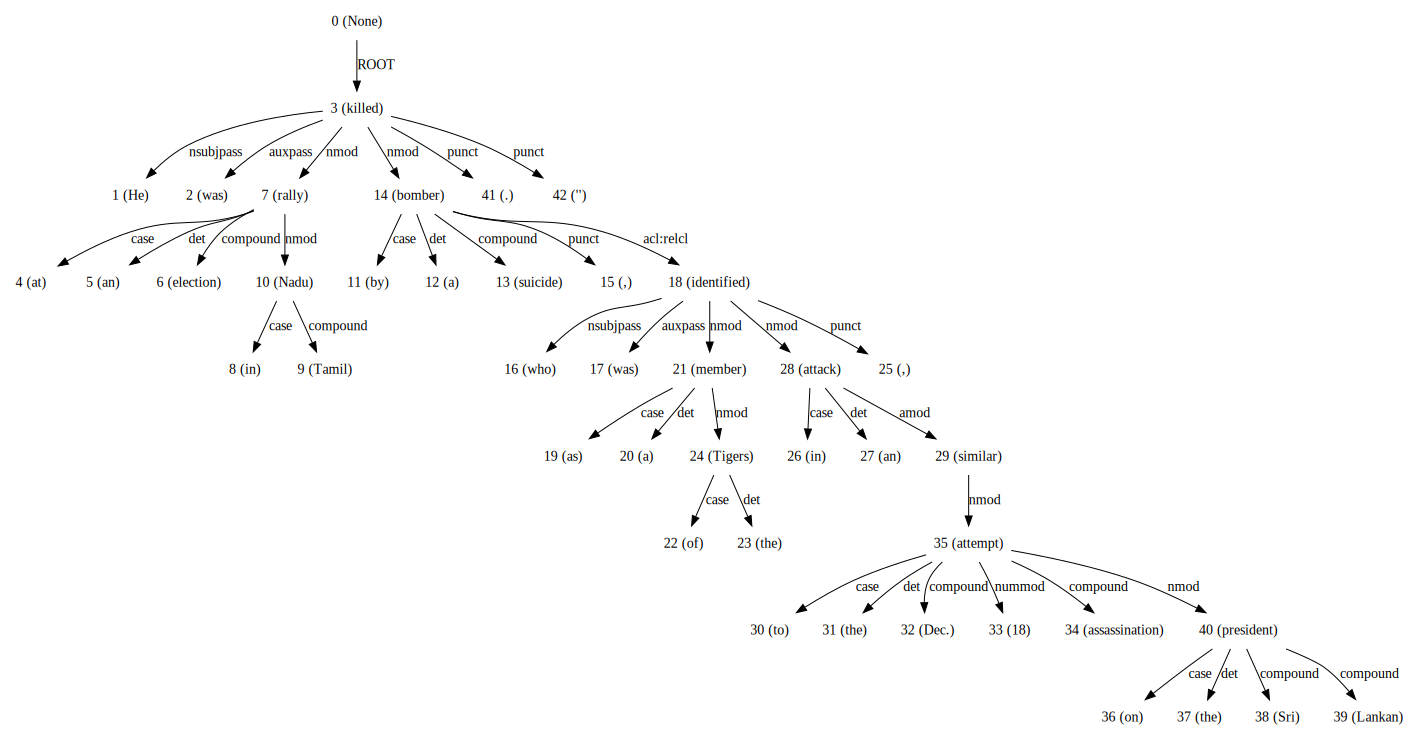

'Text = He was killed at an election rally in Tamil Nadu by a suicide bomber, who was identified as a member of the Tigers, in an attack similar to the Dec. 18 assassination attempt on the Sri Lankan president."'

'Code = 1831'

In [33]:
easy_read(assault, 47)

# Look at PETRACH and ACCENT 14_18

In [50]:
petrarch1418 = pd.read_csv("Data/PETRARCH output sample 14 18.txt", sep='\t')
petrarch18 = petrarch1418[petrarch1418['root_code']==18].reset_index().drop(['index','Unnamed: 0'], axis = 1)
petrarch18

,id_string,story_date,year,month,day,source,source_root,source_agent,source_others,target,...,placeName,stateName,countryName,documentCountryName,ids,urls,sources,text,web_url,aid
18,3587845_v0.0.0,20020714,2002,7,14,---REB,NaN,REB,NaN,FRACVL,...,Karachi,Sindh,PAK,NaN,5e29e62836b9743750f3c30b_9,---,NYT,"In May , a suicide bomber killed 11 French eng...",---,23850418
19,3587854_v0.0.0,20020620,2002,6,20,---REB,NaN,REB,NaN,PSE,...,State of Israel,NaN,ISR,NaN,5e29e62836b9743750f3c30a_22,---,NYT,`` The suicide bombers harm Palestinian intere...,---,23849693
28,3587998_v0.0.0,20040202,2004,2,2,---REB,NaN,REB,NaN,IRQOCCPTYMUS,...,Republic of Iraq,NaN,IRQ,NaN,5e29e62836b9743750f3c32d_0,---,NYT,Two suicide bombers killed at least 56 people ...,---,23976893
31,3588016_v0.0.0,20051027,2005,10,27,---CVL,NaN,CVL,NaN,ISR,...,H̱adera,Haifa,ISR,NaN,5e29e62836b9743750f3c347_36,---,NYT,<umient> <uopts> <ety> 39 </ety> <enum> 0 </en...,---,24068845


### Parse PETRARCH Root Code 18

In [60]:
%time petrarch18['parsed'] = core_parser(petrarch18, 'text')
petrarch18['dep'] = dep_parser(petrarch18, 'text')

CPU times: user 95.8 ms, sys: 8.89 ms, total: 105 ms
Wall time: 6.68 s


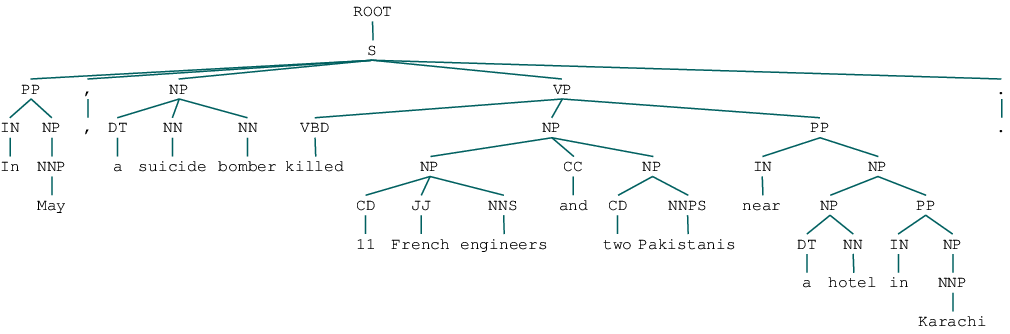

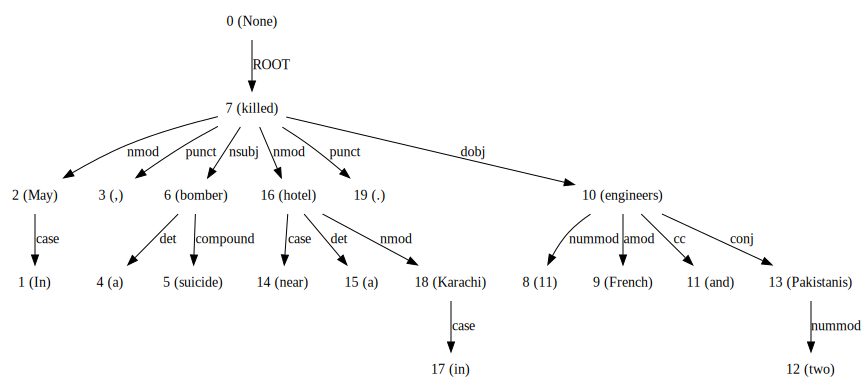

'Text = In May , a suicide bomber killed 11 French engineers and two Pakistanis near a hotel in Karachi .'

'Code = 1831'

In [65]:
easy_read(petrarch18, 18)

### Identify instances where ACCENT and PETRARCH found the same event in the same article

In [191]:
keys = list(["aid", "code"])
petrarch18i1 = petrarch18.set_index(keys).index
assaulti2 = assault.set_index(keys).index
petrarch18_trim = petrarch18[~petrarch18i1.isin(assaulti2)]
both1 = petrarch18[petrarch18i1.isin(assaulti2)]
both_petrarch_coded = both1.sort_values(['aid'])
both_petrarch_coded

,id_string,story_date,year,month,day,source,source_root,source_agent,source_others,target,...,countryName,documentCountryName,ids,urls,sources,text,web_url,aid,parsed,dep
13,3587751_v0.0.0,19841031,1984,10,31,---UAF,NaN,NaN,UAF,---REL,...,POL,NaN,5e29e62836b9743750f3c2a6_12,---,NYT,The priest was reported to have been kidnapped Oct. 19 by armed men who used their car to block Father Popieluszko 's auto near Torun and then drove away with him .,---,22633569,"[[[(DT The), (NN priest)], [(VBD was), (VP\n (VBN reported)\n (S\n (VP\n (TO to)\n (VP\n (VB have)\n (VP\n (VBN been)\n (VP\n (VBN kidnapped)\n (NP-TMP (NNP Oct.) (CD 19))\n (PP\n (IN by)\n (NP\n (NP (JJ armed) (NNS men))\n (SBAR\n (WHNP (WP who))\n (S\n (VP\n (VP\n (VBD used)\n (NP (PRP$ their) (NN car))\n (S\n (VP\n (TO to)\n (VP\n (VB block)\n (NP\n (NP\n (NP\n (NNP Father)\n (NNP Popieluszko)\n (POS 's))\n (NN auto))\n (PP (IN near) (NP (NNP Torun))))))))\n (CC and)\n (VP\n (ADVP (RB then))\n (VBD drove)\n (PRT (RP away))\n (PP (IN with) (NP (PRP him)))))))))))))))], [.]]]","defaultdict(<function DependencyGraph.__init__.<locals>.<lambda> at 0x1a1b152e18>,\n {0: {'address': 0,\n 'ctag': 'TOP',\n 'deps': defaultdict(<class 'list'>, {'ROOT': [4]}),\n 'feats': None,\n 'head': None,\n 'lemma': None,\n 'rel': None,\n 'tag': 'TOP',\n 'word': None},\n 1: {'address': 1,\n 'ctag': 'DT',\n 'deps': defaultdict(<class 'list'>, {}),\n 'feats': '_',\n 'head': 2,\n 'lemma': 'the',\n 'rel': 'det',\n 'tag': 'DT',\n 'word': 'The'},\n 2: {'address': 2,\n 'ctag': 'NN',\n 'deps': defaultdict(<class 'list'>, {'det': [1]}),\n 'feats': '_',\n 'head': 4,\n 'lemma': 'priest',\n 'rel': 'nsubjpass',\n 'tag': 'NN',\n 'word': 'priest'},\n 3: {'address': 3,\n 'ctag': 'VBD',\n 'deps': defaultdict(<class 'list'>, {}),\n 'feats': '_',\n 'head': 4,\n 'lemma': 'be',\n 'rel': 'auxpass',\n 'tag': 'VBD',\n 'word': 'was'},\n 4: {'address': 4,\n 'ctag': 'VBN',\n 'deps': defaultdict(<class 'l..."
10,3587594_v0.0.0,19860928,1986,9,28,---UAF,NaN,NaN,UAF,---CVL,...,PAK,NaN,5e29e62836b9743750f3c2ba_29,---,NYT,"Also in early September , armed gunmen seized a Pan American World Airways flight in Karachi , Pakistan , and took the passengers hostage .",---,22779688,"[[[(ADVP (RB Also)), (IN in), (NP (JJ early) (NNP September))], [,], [(JJ armed), (NNS gunmen)], [(VP\n (VBD seized)\n (NP\n (DT a)\n (NNP Pan)\n (NNP American)\n (NNP World)\n (NNPS Airways)\n (NN flight))\n (PP (IN in) (NP (NNP Karachi) (, ,) (NNP Pakistan) (, ,)))), (CC and), (VP (VBD took) (NP (DT the) (NNS passengers) (NN hostage)))], [.]]]","defaultdict(<function DependencyGraph.__init__.<locals>.<lambda> at 0x1a1b152ea0>,\n {0: {'address': 0,\n 'ctag': 'TOP',\n 'deps': defaultdict(<class 'list'>, {'ROOT': [8]}),\n 'feats': None,\n 'head': None,\n 'lemma': None,\n 'rel': None,\n 'tag': 'TOP',\n 'word': None},\n 1: {'address': 1,\n 'ctag': 'RB',\n 'deps': defaultdict(<class 'list'>, {}),\n 'feats': '_',\n 'head': 8,\n 'lemma': 'also',\n 'rel': 'advmod',\n 'tag': 'RB',\n 'word': 'Also'},\n 2: {'address': 2,\n 'ctag': 'IN',\n 'deps': defaultdict(<class 'list'>, {}),\n 'feats': '_',\n 'head': 4,\n 'lemma': 'in',\n 'rel': 'case',\n 'tag': 'IN',\n 'word': 'in'},\n 3: {'address': 3,\n 'ctag': 'JJ',\n 'deps': defaultdict(<class 'list'>, {}),\n 'feats': '_',\n 'head': 4,\n 'lemma': 'early',\n 'rel': 'amod',\n 'tag': 'JJ',\n 'word': 'early'},\n 4: {'address': 4,\n 'ctag': 'NNP',\n 'deps': defaultdict(<class 'list'>,\n ..."
30,3588012_v0.0.0,19880320,1988,3,20,---REB,NaN,REB,NaN,SLVGOV,...,SLV,NaN,5e29e62836b9743750f3c2cb_11,---,NYT,The rebels also kidnapped the mayors of the town of Cojutepeque in Santa Ana dapartment and the town of San Miguel de Mercedes in Chalatenango department .,---,22930509,"[[[(DT The), (NNS rebels)], [(RB also)], [(VBD kidnapped), (NP\n (NP (DT the) (NNS mayors))\n (PP\n (IN of)\n (NP\n (NP (DT the) (NN town))\n (PP\n (IN of)\n (NP\n (NP\n (NP (NNP Cojutepeque))\n (PP (IN in) (NP (NNP Santa) (NNP Ana) (NN dapartment))))\n (CC and)\n (N

In [170]:
assaulti1 = assault.set_index(keys).index
petrarch18i2 = petrarch18.set_index(keys).index
assault_trim = assault[~assaulti1.isin(petrarch18i2)]
both2 = assault[assaulti1.isin(petrarch18i2)]
both_accent_coded = both2.sort_values(['aid'])

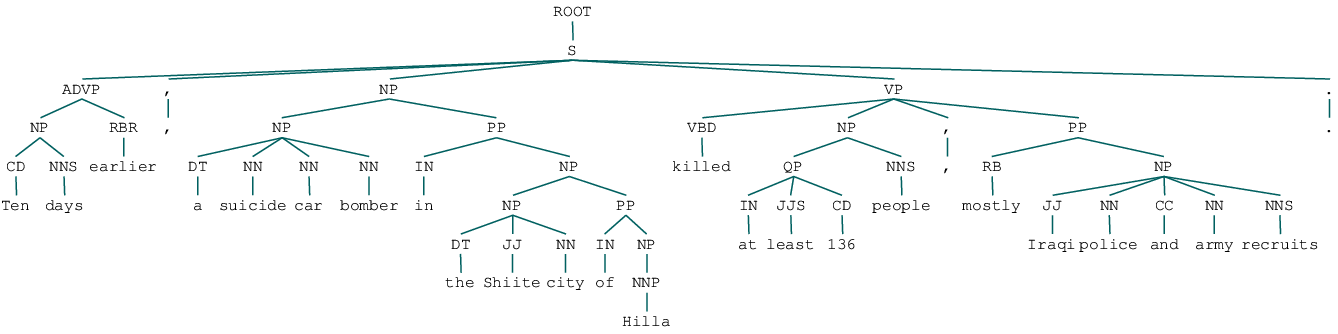

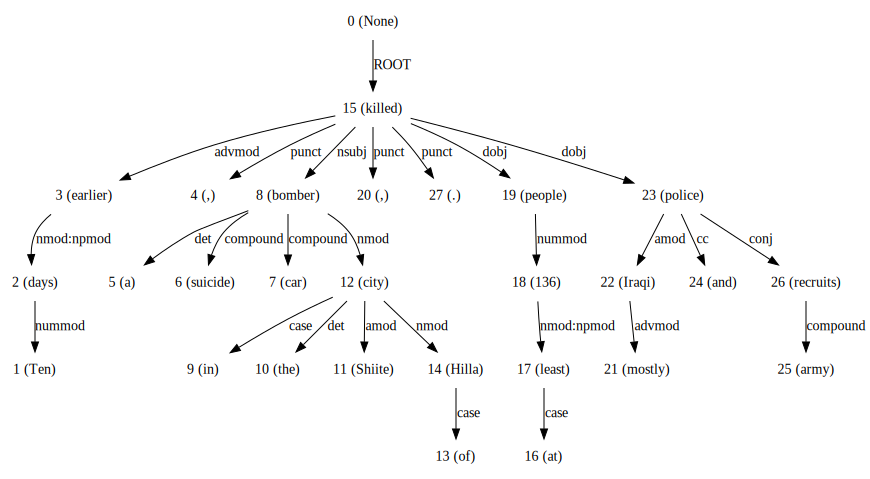

'Text = Ten days earlier, a suicide car bomber in the Shiite city of Hilla killed at least 136 people, mostly Iraqi police and army recruits.'

'Code = 1831'

In [156]:
easy_read(both_accent_coded, 9)

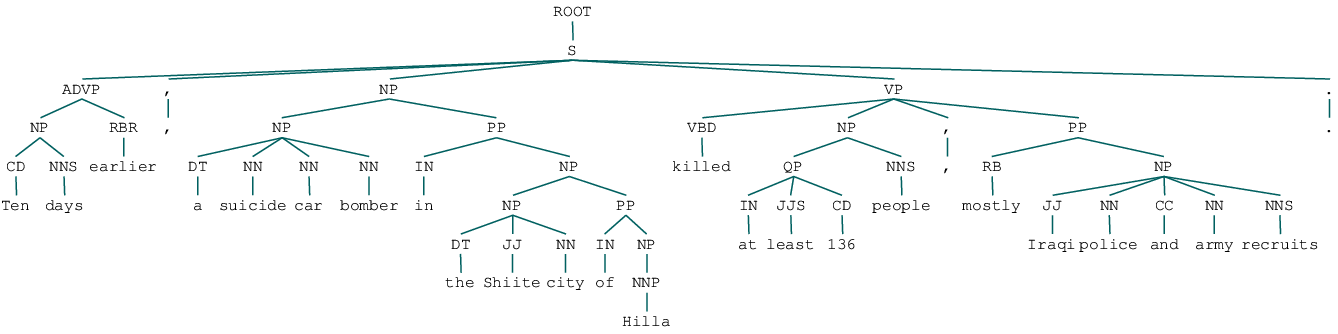

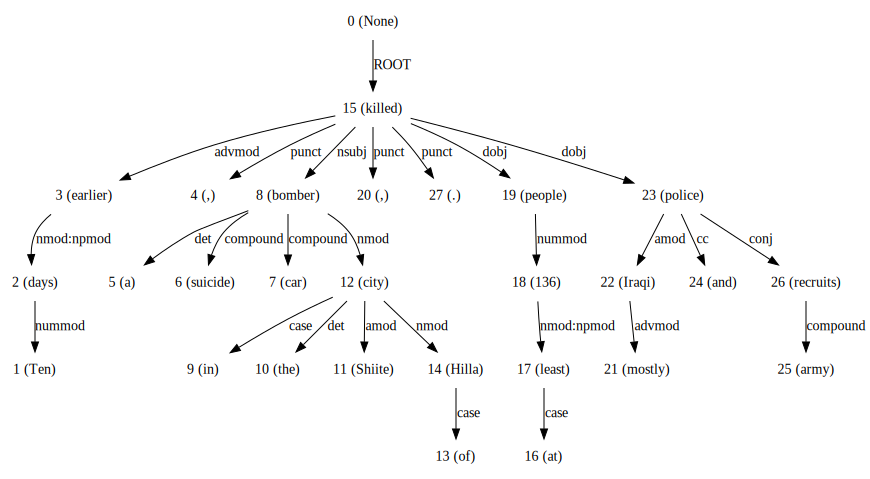

'Text = Ten days earlier , a suicide car bomber in the Shiite city of Hilla killed at least 136 people , mostly Iraqi police and army recruits .'

'Code = 1831'

In [159]:
easy_read(both_petrarch_coded, 9)

### Identify instances where ACCENT/PETRARCH found different events in the same article

In [167]:
new_key = list(['aid'])
petrarch18i10 = petrarch18.set_index(new_key).index
assaulti20 = assault.set_index(new_key).index
petrarch18_trim_2 = petrarch18[~petrarch18i10.isin(assaulti20)]
both10 = petrarch18[petrarch18i10.isin(assaulti20)]
both_petrarch_coded2 = both10.sort_values(['aid'])

In [168]:
assaulti10 = assault.set_index(new_key).index
petrarch18i20 = petrarch18.set_index(new_key).index
assault_trim_2 = assault[~assaulti10.isin(petrarch18i20)]
both20 = assault[assaulti10.isin(petrarch18i20)]
both_accent_coded2 = both20.sort_values(['aid'])

In [211]:
i1 = both_petrarch_coded2.set_index(keys).index
i2 = both_accent_coded2.set_index(keys).index
trim = both_petrarch_coded2[~i1.isin(i2)]
discard = both_petrarch_coded2[i1.isin(i2)]

In [212]:
i10 = both_accent_coded2.set_index(keys).index
i20 = both_petrarch_coded2.set_index(keys).index
trim2 = both_accent_coded2[~i10.isin(i20)]
discard2 = both_accent_coded2[i10.isin(i20)]

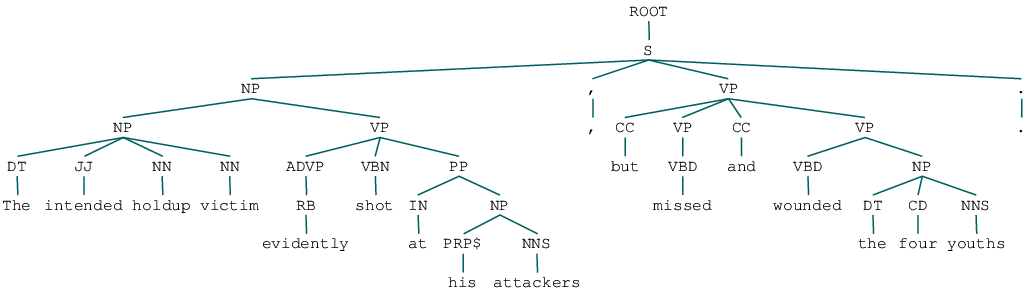

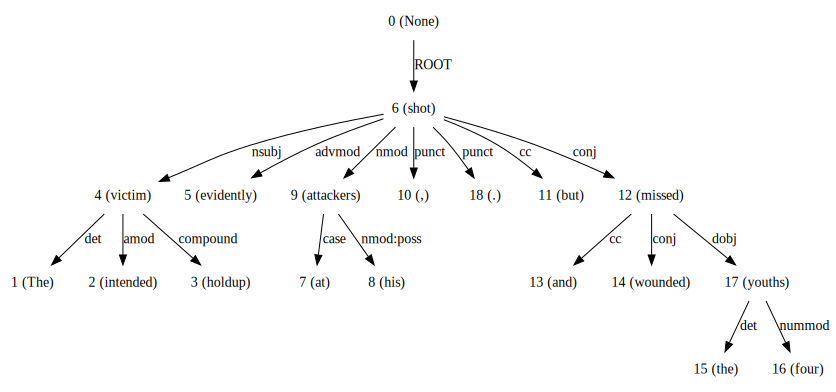

'Text = The intended holdup victim evidently shot at his attackers , but missed and wounded the four youths .'

'Code = 180'

In [205]:
easy_read(trim, 0)

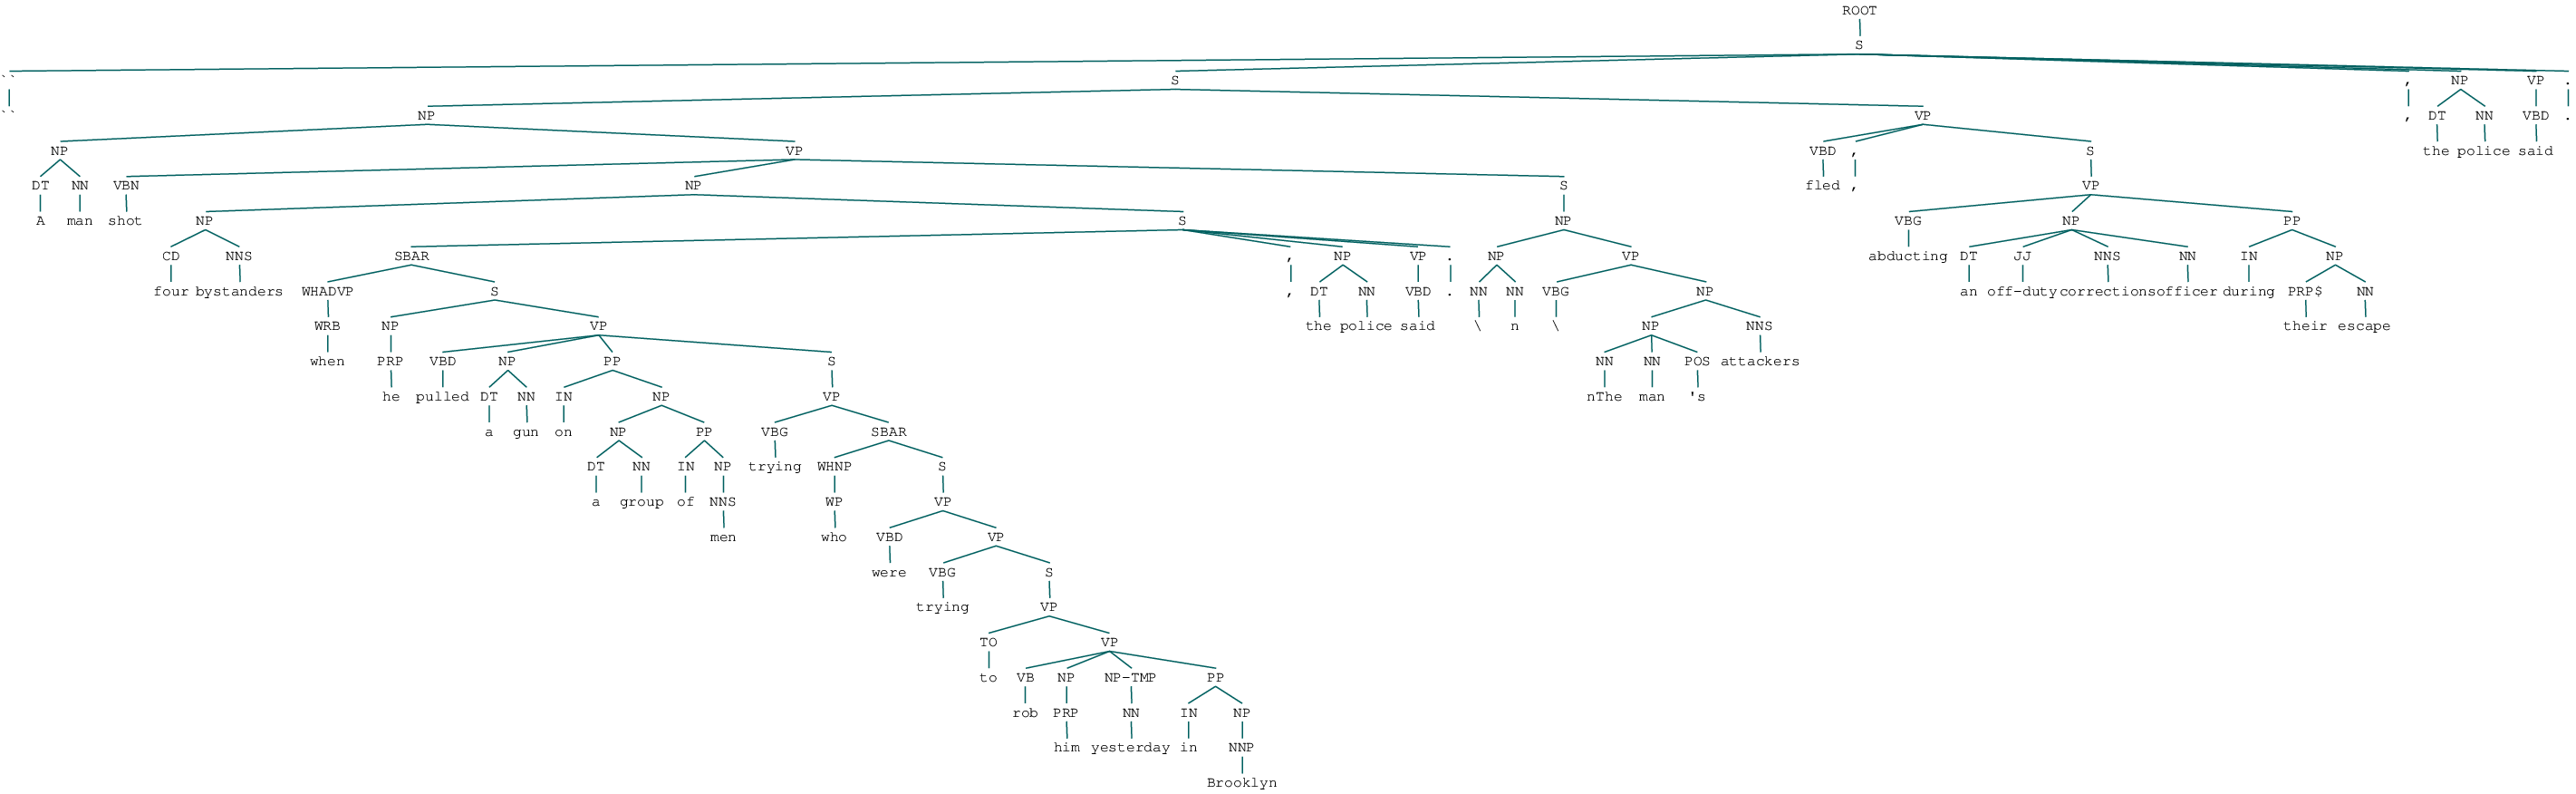

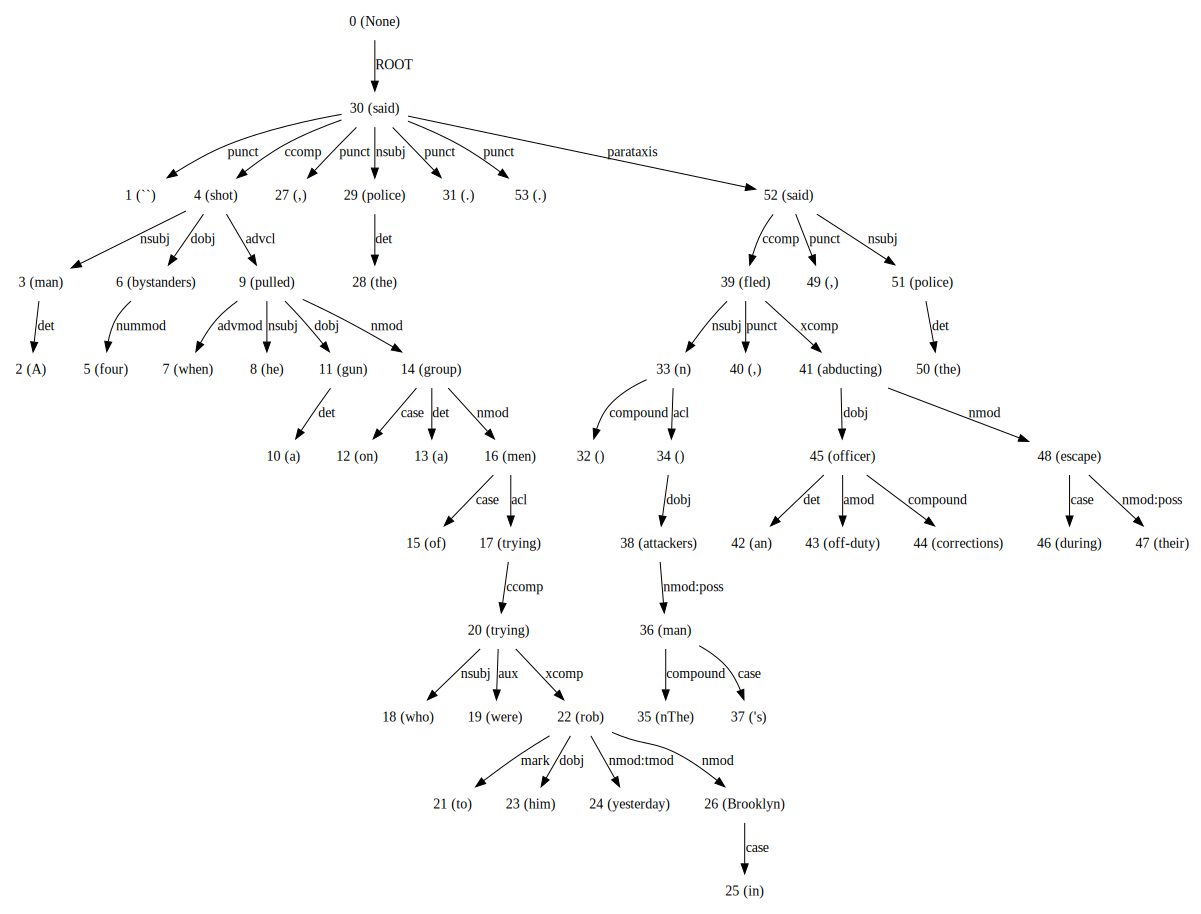

'Text = "A man shot four bystanders when he pulled a gun on a group of men trying who were trying to rob him yesterday in Brooklyn, the police said.\\n\\nThe man\'s attackers fled, abducting an off-duty corrections officer during their escape, the police said.'

'Code = 181'

In [207]:
easy_read(trim2, 0)

# Extraneous Projects
#### py-CoreNLP Wrapper

In [21]:
from pycorenlp import StanfordCoreNLP

nlp = StanfordCoreNLP('http://localhost:9000')

def depparse(text):
    parsed=""
    output = nlp.annotate(text, properties={
      'annotators': 'depparse',
      'outputFormat': 'json'
      })

    for i in output["sentences"]:
        for j in i["basicDependencies"]:
            parsed=parsed+str(j["dep"]+'('+ j["governorGloss"]+' ')+str(j["dependentGloss"]+')'+' ')
        return parsed
text="I put the book in the box on the table."

#### Stanford NLP Python Package Parser
The sentence structure of the BBN/ACCENT output makes it impossible to loop through... going to need to do some REGEX work on it to get it into a format where sentences are not broken up. Assuming 'nlp' command breaks up sentences at any '.' which is going to be a problem when trying to clean it up. 

In [ ]:
import stanfordnlp
stanfordnlp.download('en')   # This downloads the English models for the neural pipeline
nlp = stanfordnlp.Pipeline() # This sets up a default neural pipeline in English
doc = nlp("Barack Obama was born in Hawaii.  He was elected president in 2008.")
doc.sentences[0].print_dependencies()

In [ ]:
def stanlp(df, col):
    for i in range(len(df)):
        arg = nlp(df[col].iloc[i])
    return arg

In [ ]:
flop = stanlp(protest_violent, "text")

In [ ]:
flop.sentences[1].print_dependencies()